<a id='top'></a>
This notebook contains all the code used to find the answers requested. Below mentioned hyperlinks can be used to navigate between answers.

### Note : All files have been exported to Microsoft Excel 2013 format (.xlsx) 

[Data Cleaning](#clean)    
[Merging of data](#merge)   
[Question 1](#q1)   
[Question 2](#q2)   
[Question 3](#q3)   
[Question 4](#q4)   
[Bonus Questions](#bonus)   
[Bonus Question 1](#bq1)   
[Bonus Question 2](#bq2)   
[Bonus Question 3](#bq3)   
[Bonus Question 4](#bq4)   

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read all the input files

info_df = pd.read_excel('file_01.xlsx')
cost_df = pd.read_excel('file_02.xlsx')
zone_df = pd.read_excel('file_04.xlsx')

In [3]:
# Info df contains product quantities, and source to destination information

info_df.head()

,supplier_location,customer_location,shpment_size,payment_option,product_quantity,current_logistics_vendor
0,facility_01,201301,small,cod,2156,v1
1,facility_01,122001,small,cod,1859,v1
2,facility_01,248001,small,cod,1805,v1
3,facility_01,201301,small,prepaid,1555,v1
4,facility_01,800001,small,cod,1508,v1


In [4]:
# cost_df contains cost per product for each vendor

cost_df.head()

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4
0,zone_C,cod,large,1480,1480,1100,1080
1,zone_C,cod,medium,480,560,410,410
2,zone_C,cod,small,90,120,80,80
3,zone_C,prepaid,large,1450,1430,1040,1050
4,zone_C,prepaid,medium,450,510,380,370


In [5]:
# zone df contains zone information

zone_df.head()

,source,destination,shipment_zone
0,facility_06,110001,zone_a
1,facility_06,110001,zone_a
2,facility_06,110001,zone_a
3,facility_06,110001,zone_a
4,facility_06,110001,zone_a


### Data Cleaning and exploration
<a id='clean' ></a>
[Back to Top](#top)

In [6]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92851 entries, 0 to 92850
Data columns (total 6 columns):
supplier_location           92851 non-null object
customer_location           92851 non-null int64
shpment_size                92851 non-null object
payment_option              92851 non-null object
product_quantity            92851 non-null int64
current_logistics_vendor    92851 non-null object
dtypes: int64(2), object(4)
memory usage: 4.3+ MB


In [7]:
info_df.supplier_location.unique()

array(['facility_01', 'facility_02', 'facility_03', 'facility_04',
       'facility_05', 'facility_06', 'facility_07', 'facility_08',
       'facility_09', 'facility_10'], dtype=object)

In [8]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
zone                   18 non-null object
mode                   18 non-null object
size                   18 non-null object
cost_with_vendor_v1    18 non-null int64
cost_with_vendor_v2    18 non-null int64
cost_with_vendor_v3    18 non-null int64
cost_with_vendor_v4    18 non-null int64
dtypes: int64(4), object(3)
memory usage: 1.1+ KB


In [9]:
cost_df['mode'].unique()

array(['cod', 'prepaid', 'COD'], dtype=object)

In [10]:
zone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92851 entries, 0 to 92850
Data columns (total 3 columns):
source           92851 non-null object
destination      92851 non-null int64
shipment_zone    92851 non-null object
dtypes: int64(1), object(2)
memory usage: 2.1+ MB


In [11]:
zone_df.source.unique()

array(['facility_06', 'facility_02', 'facility_01', 'facility_10',
       'facility_07', 'facility_08', 'facility_04', 'facility_03',
       'facility_05', 'facility_09'], dtype=object)

In [12]:
# Renaming few columns for convenience

info_df.rename(columns={'shpment_size':'shipment_size'}, inplace=True)
cost_df.rename(columns={'zone_C':'zone_c', 'Zone_B':'zone_b', 'size':'shipment_size', 'mode':'payment_option'}, inplace=True)

In [29]:
# Making payment option column as all small letters
cost_df['payment_option'] = cost_df.payment_option.apply(lambda x : x.lower())
cost_df['zone'] = cost_df.zone.apply(lambda x : x.lower())

In [22]:
# Zone df has duplicates, removing them

zone_df_orig = zone_df.copy()
zone_df.drop_duplicates(inplace=True)

# Merging all data into one dataframe

<a id='merge'></a>
[Back to Top](#top)

Note: Since either zone_df duplicates can be removed before merge, or after merge. But before merge will be faster

In [25]:
info_zone_df = pd.merge(left=info_df.copy(), right=zone_df.copy(), left_on=['supplier_location', 'customer_location'], right_on=['source', 'destination'], how='left')
info_zone_df.drop(columns=['source', 'destination'], inplace=True)

In [26]:
info_zone_df.head()

,supplier_location,customer_location,shipment_size,payment_option,product_quantity,current_logistics_vendor,shipment_zone
0,facility_01,201301,small,cod,2156,v1,zone_a
1,facility_01,122001,small,cod,1859,v1,zone_a
2,facility_01,248001,small,cod,1805,v1,zone_b
3,facility_01,201301,small,prepaid,1555,v1,zone_a
4,facility_01,800001,small,cod,1508,v1,zone_c


In [30]:
info_zone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92851 entries, 0 to 92850
Data columns (total 7 columns):
supplier_location           92851 non-null object
customer_location           92851 non-null int64
shipment_size               92851 non-null object
payment_option              92851 non-null object
product_quantity            92851 non-null int64
current_logistics_vendor    92851 non-null object
shipment_zone               92851 non-null object
dtypes: int64(2), object(5)
memory usage: 5.7+ MB


In [35]:
left_on = ['shipment_zone', 'payment_option', 'shipment_size']
right_on = ['zone', 'payment_option', 'shipment_size']
op_df = pd.merge(left=info_zone_df.copy(), right=cost_df.copy(), left_on=left_on, right_on=right_on, how='left')
op_df.drop(columns=['zone'], inplace=True)

In [36]:
# Final DataFrame with Information merged from all the three dataframes accordingly
op_df.head()

,supplier_location,customer_location,shipment_size,payment_option,product_quantity,current_logistics_vendor,shipment_zone,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4
0,facility_01,201301,small,cod,2156,v1,zone_a,50,90,50,60
1,facility_01,122001,small,cod,1859,v1,zone_a,50,90,50,60
2,facility_01,248001,small,cod,1805,v1,zone_b,60,90,60,70
3,facility_01,201301,small,prepaid,1555,v1,zone_a,30,30,30,30
4,facility_01,800001,small,cod,1508,v1,zone_c,90,120,80,80


## Question 1
<a id='q1'></a>

What is the current vendor wise supply volume distributed

[Back to Top](#top)

Answer:   
v1    88.416936   
v2     2.693742   
v3     3.328928   
v4     5.560394   

In [53]:
quantities = op_df.groupby(by='current_logistics_vendor')['product_quantity'].sum()
quantities

current_logistics_vendor
v1    3099255
v2      94423
v3     116688
v4     194907
Name: product_quantity, dtype: int64

The vendor wise volume based on **product quantity** ignoring the shipment size is as below

In [157]:
old_volume = quantities/quantities.sum() * 100
old_volume

current_logistics_vendor
v1    88.416936
v2     2.693742
v3     3.328928
v4     5.560394
Name: product_quantity, dtype: float64

## Question 2
What is the current vendor wise cost incurred for fulfilling the supply network ?

<a id='q2'></a>
[Back to Top](#top)

Answer :    
v1    370038040   
v2     12276540   
v3     12715930   
v4     19999380   

In [68]:
# Creating current cost column
final_df = op_df.copy()
vendors = op_df.current_logistics_vendor.unique()
for vendor in vendors:
    tdf = op_df[op_df.current_logistics_vendor == vendor].copy()
    tdf['current_cost'] = tdf.product_quantity * tdf['cost_with_vendor_{}'.format(str(vendor))]
    final_df.loc[tdf.index, 'current_cost'] = tdf.current_cost.copy()

In [76]:
# Display the Final DataFrame with Current Cost

final_df.head()

,supplier_location,customer_location,shipment_size,payment_option,product_quantity,current_logistics_vendor,shipment_zone,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4,current_cost
0,facility_01,201301,small,cod,2156,v1,zone_a,50,90,50,60,107800.0
1,facility_01,122001,small,cod,1859,v1,zone_a,50,90,50,60,92950.0
2,facility_01,248001,small,cod,1805,v1,zone_b,60,90,60,70,108300.0
3,facility_01,201301,small,prepaid,1555,v1,zone_a,30,30,30,30,46650.0
4,facility_01,800001,small,cod,1508,v1,zone_c,90,120,80,80,135720.0


In [78]:
# Vendor Wise Cost Incurred
final_df.groupby('current_logistics_vendor').sum()['current_cost']

current_logistics_vendor
v1    370038040.0
v2     12276540.0
v3     12715930.0
v4     19999380.0
Name: current_cost, dtype: float64

## Question 3
What is the least cost that will be incurred to fulfill this supply network ?

<a id='q3' ></a>
[Back to Top](#top)

Note : All vendors have supply network in all the zones

Answer : 349411400

In [83]:
# Create Cost for Each Vendor
for vendor in vendors:
    final_df['cost_{}'.format(vendor)] = final_df.product_quantity * final_df['cost_with_vendor_{}'.format(vendor)]

In [92]:
# Calculate Total Cost Incurred For All networks

final_df[['current_cost', 'cost_v1', 'cost_v2', 'cost_v3', 'cost_v4']]

,current_cost,cost_v1,cost_v2,cost_v3,cost_v4
0,107800.0,107800,194040,107800,129360
1,92950.0,92950,167310,92950,111540
2,108300.0,108300,162450,108300,126350
3,46650.0,46650,46650,46650,46650
4,135720.0,135720,180960,120640,120640
5,274470.0,274470,405170,209120,352890
6,61800.0,61800,111240,61800,74160
7,37050.0,37050,37050,37050,37050
8,245070.0,245070,361770,186720,315090
9,207860.0,207860,284440,142220,262560


In [94]:
# Sum of Minimum Cost across all products
final_df[['current_cost', 'cost_v1', 'cost_v2', 'cost_v3', 'cost_v4']].min(axis=1).sum()

349411400.0

## Question 4
How much cost savings can be done if we chose the least cost to fulfill this network

<a id='q4'></a>
[Back to Top](#top)

Answer : 71118490 units, 17.13 percentage savings with respect to current cost

In [96]:
original_cost = final_df.current_cost.sum()
minimum_cost = 343911400 #From previous question

# Cost Savings
savings = original_cost - minimum_cost
savings

71118490.0

In [98]:
# Percentage Savings

savings/original_cost * 100

17.13575135516143

# Bonus Questions

Any cells below will be used to answer bonus questions

<a id='bonus'></a>
[Back to Top](#bonus)

<a id='bq1'></a>

## Bonus Question 1 :

Which is the busiest zone

Answer : zone_c is the busiest both cost wise and quantity wise

In [100]:
final_df.groupby(by='shipment_zone').sum()[['product_quantity', 'current_cost']]

,product_quantity,current_cost
shipment_zone,,
zone_a,438352,41582530.0
zone_b,1361689,141524700.0
zone_c,1705232,231922660.0


## Bonus Question: 2
<a id='bq2'></a>
Which zone handles the highest number of large shipments, as percentage of their total shipments.

Answer: Zone A has 11 percentage large shipments, while Zone B and C have 1.8 and 0.4 percent respectively.   
[Back to Top](#top)

In [105]:
gdf = final_df.groupby(by=['shipment_zone', 'shipment_size']).count()[['product_quantity', 'current_cost']]
gdf

product_quantity  current_cost
shipment_zone shipment_size                                
zone_a        large                       593           593
              medium                     2083          2083
              small                      2401          2401
zone_b        large                       672           672
              medium                    11181         11181
              small                     23710         23710
zone_c        large                       235           235
              medium                    13975         13975
              small                     38001         38001

In [144]:
indices = gdf.index.get_level_values(level=0).unique()
output = {}
for index in indices:
    q = gdf.loc[index]/gdf.loc[index].sum()
    output[index] = q.loc['large', 'product_quantity']

In [145]:
output

{'zone_a': 0.1168012605869608,
 'zone_b': 0.018896043640862694,
 'zone_c': 0.004500967229127961}

## Bonus Question 3
<a id='bq3'></a>

Who is my most economical vendor

Answer : Vendor 3, based just on the current cost, and ignoring other variables    
[Back to Top](#top)

In [147]:
final_df.groupby('current_logistics_vendor').sum()['current_cost']

current_logistics_vendor
v1    370038040.0
v2     12276540.0
v3     12715930.0
v4     19999380.0
Name: current_cost, dtype: float64

## Bonus Question 4
<a id='bq4'></a>

If minimum cost network is chosen, what is the now new vendor distribution

Answer :

v1 : 18 percent   
v2 : 0 percent   
v3 : 72 percent   
v4 : 9 percent  
[Back to Top](#top)

In [153]:
tdf = final_df[['cost_v1', 'cost_v2', 'cost_v3', 'cost_v4']].copy()
tdf['new_vendor'] = tdf.idxmin(axis=1)
tdf['new_vendor'] = tdf.new_vendor.apply(lambda x : x[-2:])
final_df['new_vendor'] = tdf.new_vendor.copy()
final_df['new_cost'] = tdf.min(axis=1)

In [158]:
x = final_df.groupby('new_vendor').sum()['new_cost']
new_volume = x/x.sum() * 100
new_volume

new_vendor
v1    18.542323
v3    72.288683
v4     9.168994
Name: new_cost, dtype: float64

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [162]:
sns.set_style('darkgrid')

In [210]:
df = pd.DataFrame(data=[old_volume, new_volume], index=['old', 'new'])
df.reset_index(inplace=True)
df = pd.melt(df, id_vars='index')

In [211]:
df

,index,variable,value
0,old,v1,88.416936
1,new,v1,18.542323
2,old,v2,2.693742
3,new,v2,NaN
4,old,v3,3.328928
5,new,v3,72.288683
6,old,v4,5.560394
7,new,v4,9.168994


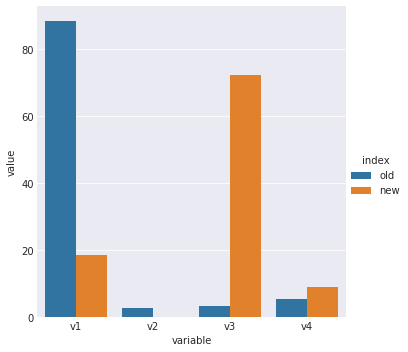

In [225]:
sns.factorplot(x='variable', y='value', data=df, hue='index', kind='bar', size=5)